Задача – Исследование оценок пользователей, поставленных организациям категории “общественное питание”, в Москве и Санкт-Петербурге

In [49]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
os.chdir("C:/Users/danil/Desktop/ИТМО/Менторство")

In [50]:
data = pd.read_csv('UPD_organisations_rating.csv')
pd.set_option("display.max_columns", 999)

In [51]:
data

,user_id,org_id,rating,ts,user_city,org_city,average_bill,rating_org,rubrics,food_delivery,breakfast,takeaway,summer_terrace,wi_fi,business_lunch,payment_by_credit_card,coffee_to_go,closed_for_quarantine,online_takeaway,karaoke,special_menu,sports_broadcasts,food_court1,craft_beer,projector,gift_certificate,wheelchair_access,automatic_door,food_product_delivery,car_park,parking_disabled,toilet_for_disabled,promotions,cafe,minimum_order,free_delivery,self_service_kiosks,has_restaurant,air_conditioning,pets,elevator,has_bar,internet access,privilege_tickets,organic_food,vip_zone,hall_capacity,face_control,show_program,music,chillout,dancefloor,dress_code,billiards,strip,elevator_wheelchair_accessible,ramp,around_the_clock_work1,pickup,farm_products,delivery,coffee_shop,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
0,16998268288908323644,7184895086928047809,2.0,105,msk,msk,500.0,4.038688,Быстрое питание,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12147440994693609441,7184895086928047809,1.0,1072,msk,msk,500.0,4.038688,Быстрое питание,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10182924528690880798,7184895086928047809,2.0,420,msk,msk,500.0,4.038688,Быстрое питание,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3333318221433111575,7184895086928047809,3.0,643,msk,msk,500.0,4.038688,Быстрое питание,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6208487353916435376,7184895086928047809,5.0,701,msk,msk,500.0,4.038688,Быстрое питание,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104273,15294955784899173947,14098598077744238961,5.0,360,msk,msk,500.0,3.942857,"Бар, паб",1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104274,11703917998410957962,1320938479936389277,5.0,938,msk,msk,NaN,5.000000,Быстрое питание,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104275,15156366931753110553,38687591955213456,5.0,506,msk,msk,NaN,4.000000,Столовая,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104276,743309475815728617,11330964002675972575,1.0,634,msk,msk,1000.0,2.666667,Кафе,1,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
list_col = ['user_city', 'org_city', 'rubrics', 'average_bill']
unique_inf = {c: data[c].unique().tolist() for c in list_col}

(array([ 1705.,     0.,  1003.,     0.,     0.,  2845.,     0.,  5881.,
            0., 20328.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

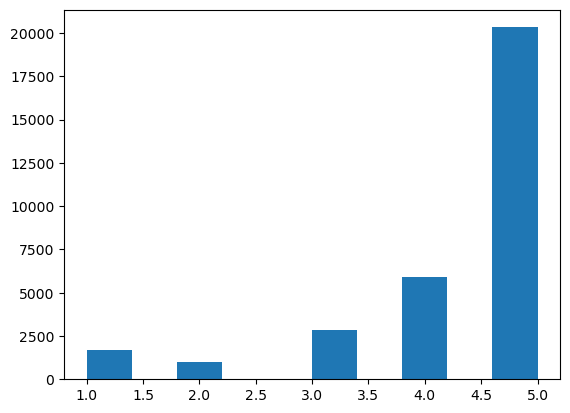

In [54]:
plt.hist(data[data['org_city']=='spb']['rating'])

[(400.0, 4000.0)]

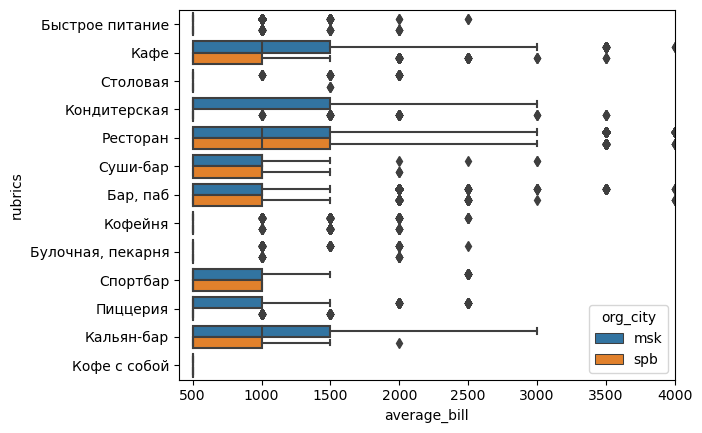

In [56]:
g = sns.boxplot(data=data[data['rubrics']!='Бар безалкогольных напитков'], x="average_bill", y="rubrics", hue="org_city")
g.set(xlim=(400, 4000))

In [ ]:
data = data.drop_duplicates()    # 48 дубликатов удалилось
data['similar_city'] = np.where(data['user_city'] == data['org_city'], 1, 0)

## Проверка гипотез
+ Н0 - при выставлении оценок для пользователей не важно, в каком городе они находятся 
- Н1 - оценки пользователей в своём городе отличаются от оценок в чужом городе

Выборки ненормально распределены, то необходимо использовать критерий Манна-Уитни.

In [58]:
# все пользователи в своем и чужом городе. Нулевая гипотеза отвергается, 
# значит, пользователи ставят заведениям оценки отличные от тех, которые они ставят заведениям в своём городе
one_city = data[data['similar_city'] == 1]
diff_city = data[data['similar_city'] == 0]
print(f"p-value: {stats.mannwhitneyu(one_city['rating'], diff_city['rating'])[1]}")

p-value: 3.0904609691889194e-21


[(4.0, 4.713007723995879)]

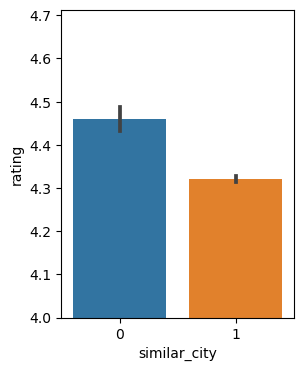

In [59]:
# заметно, что пользователи из Москвы, находясь в Санкт-Петербурге, ставят заведениям оценки выше, 
# а поведение пользователей из Санкт-Петербурга не меняется
fig, ax = plt.subplots(figsize=(3, 4))
g = sns.barplot(data=data, x="similar_city", y="rating")
g.set(ylim=(4, None))

Нулевая гипотеза отвергается, так как p-value < 0.05. 
Средняя оценка пользователей по всем категориям в чужом городе (similar_city = 0) отличается на статистически значимую величину 

In [60]:
# оценки пользователей из Москвы в своём и чужом городе. Поведение пользователей меняется, в среднем, они ставят оценки выше
one_city_msk = data.loc[(data['user_city'] == 'msk') & ((data['org_city'] == 'msk'))]['rating']
diff_city_msk = data.loc[(data['user_city'] == 'msk') & ((data['org_city'] == 'spb'))]['rating']
print(f"p-value: {stats.mannwhitneyu(one_city_msk, diff_city_msk)[1]}")  # отвергаем нулевую гипотезу

p-value: 1.443934329230173e-25


In [61]:
rest_msk = data.loc[(data['rubrics'] == 'Ресторан') & ((data['org_city'] == 'msk'))]['average_bill']
rest_msk = rest_msk[rest_msk.notna()]
rest_spb = data.loc[(data['rubrics'] == 'Ресторан') & ((data['org_city'] == 'spb'))]['average_bill']
rest_spb = rest_spb[rest_spb.notna()]
print(f"p-value: {stats.mannwhitneyu(rest_msk, rest_spb)[1]}")  # отвергаем нулевую гипотезу

p-value: 2.3000997245844087e-108


In [62]:
# оценки пользователей из Санкт-Петербурга в своём и чужом городе. Поведение пользователей не меняется
one_city_spb = data.loc[(data['user_city'] == 'spb') & ((data['org_city'] == 'spb'))]['rating']
diff_city_spb = data.loc[(data['user_city'] == 'spb') & ((data['org_city'] == 'msk'))]['rating']
print(f"p-value: {stats.mannwhitneyu(one_city_spb, diff_city_spb)[1]}")

p-value: 0.754312305001857


[(4.0, 4.757566952844694)]

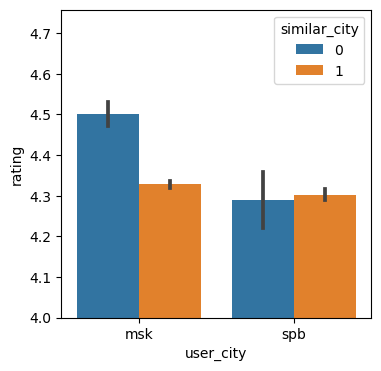

In [63]:
# заметно, что пользователи из Москвы, находясь в Санкт-Петербурге, ставят заведениям оценки выше, 
# а поведение пользователей из Санкт-Петербурга не меняется
fig, ax = plt.subplots(figsize=(4, 4))
g = sns.barplot(data=data, x="user_city", y="rating", hue = 'similar_city')
g.set(ylim=(4, None))

Пользователи из Москвы:
Нулевая гипотеза отвергается, так как p-value < 0.05. 
Заметно, что пользователи из Москвы, находясь в чужом городе, ставят заведениям оценки выше

Пользователи из Санкт-Петербурга:
Нулевая гипотеза не отвергается, так как p-value > 0.05. 
Поведение пользователей из Санкт-Петербурга не меняется в другом городе

In [64]:
keys = one_city['rubrics'].sort_values().unique().tolist() # список категорий

In [65]:
# Определяется разница в оценках пользователей в своем и чужом городе по категориям. 
# Заметно, что в категориях, указанных ниже, оценки отличаются
for c in keys:
    rub_one_city = one_city[one_city['rubrics'] == c]['rating']
    rub_diff_city = diff_city[diff_city['rubrics'] == c]['rating']
    if stats.mannwhitneyu(rub_one_city, rub_diff_city)[1] > 0.05:
        print(f"p-value для категории {c}: {stats.mannwhitneyu(rub_one_city, rub_diff_city)[1]}")

p-value для категории Бар безалкогольных напитков: 0.9729383895765331
p-value для категории Булочная, пекарня: 0.06717071928141082
p-value для категории Кальян-бар: 0.6623407067288827
p-value для категории Кондитерская: 0.22514592473666062
p-value для категории Кофе с собой: 0.8077663114483331
p-value для категории Кофейня: 0.8730591290013723
p-value для категории Пиццерия: 0.49963452654520635
p-value для категории Спортбар: 0.7269085764455958


[(3.5, 4.92)]

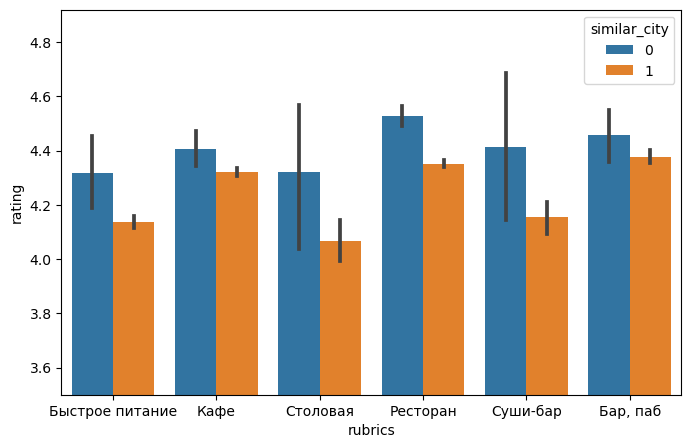

In [66]:
# заметно, что в среднем оценки пользователей по данным категориям в своем городе хуже 
fig, ax = plt.subplots(figsize=(8, 5))
g = sns.barplot(data=data.loc[(data['rubrics'] == 'Ресторан') | (data['rubrics'] == 'Кафе') | 
                              (data['rubrics'] == 'Быстрое питание') | (data['rubrics'] == 'Бар, паб') 
                              | (data['rubrics'] == 'Столовая') | (data['rubrics'] == 'Суши-бар')], 
            x="rubrics", y="rating", hue = 'similar_city')
g.set(ylim=(3.5, None))

Оценки пользователей в своём и чужом городе статистически значимо отличаются не по всем категориям. На рисунке слева указаны категории заведений, которые пользователи из других городов оценивают выше.
Это может объясняться тем, что туристы больше склонны “эмоционально” оценивать заведения и др.
Нулевая гипотеза отвергается для категорий, указанных выше, так как p-value < 0.05  

[(3.5, 4.83796720636663)]

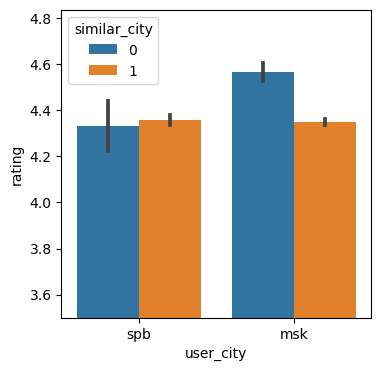

In [67]:
# средние оценки ресторанов жителями Москвы и Санкт-Петербурга в своем и чужом городе 
fig, ax = plt.subplots(figsize=(4, 4))
g = sns.barplot(data=data.loc[(data['rubrics'] == 'Ресторан')], 
            x="user_city", y="rating", hue = 'similar_city')
g.set(ylim=(3.5, None))

Выше представлены средние оценки пользователей из Санкт-Петербурга и Москвы в своём и чужом городе по категории “Рестораны”. Заметно, что пользователи из Москвы, находясь в чужом городе, ставят заведениям оценки выше, 
а поведение пользователей из Санкт-Петербурга почти не меняется, оценки даже становятся чуть ниже.
Предполагаемая причина более высоких оценок пользователей из Москвы ресторанов в Санкт-Петербурге – в среднем, схожий уровень сервиса, качества блюд при более дешёвом среднем чеке (подтверждено также тестом Манна-Уитни).

Таким образом, в ходе анализа выдвигаемой гипотезы стало понятно, что для пользователей важно местоположение заведения при оценивании. Важно отметить, что это характерно для пользователей из Москвы и лишь по некоторым из имеющихся в датасете категорий.

На оценки заведений категорий “Бар безалкогольных напитков”, “Булочная, пекарня”, “Кальян-бар”, “Кондитерская”, “Кофе с собой”, “Кофейня”, “Пиццерия”, “Спортбар” не оказывает влияние, является ли пользователь туристом или местным жителем. Базируясь на данном датасете, можно дать рекомендацию этим видам бизнеса рекомендацию “не делать упор на ту или иную категорию пользователей”, а стараться развиваться в других аспектах (улучшать предложение, оптимизировать себестоимость).

Однако для ресторанов, кафе, баров, где значимую роль в обретении и сохранении высокого рейтинга играют туристы, важно “поощрять” туристов в виде акций в активные туристические периоды (лето, праздники), “локальные” напитки, блюда, чтобы у туриста было ощущение причастности к “местной кухне”.
Все это повышает узнаваемость брендов, создаёт устойчивую базу лояльных клиентов и повышает выручку/прибыль.


